In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from pathlib import Path
from PIL import Image
from rpca import RobustPCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re

In [2]:
dataset = 'peds'
data_dir = Path.cwd().parents[2] / 'JPEGS' / dataset
data_files = sorted(data_dir.glob('*'))
data_files[:5]

[PosixPath('/home/lcoyle/Documents/rpca/JPEGS/peds/frame_00001.jpg'),
 PosixPath('/home/lcoyle/Documents/rpca/JPEGS/peds/frame_00002.jpg'),
 PosixPath('/home/lcoyle/Documents/rpca/JPEGS/peds/frame_00003.jpg'),
 PosixPath('/home/lcoyle/Documents/rpca/JPEGS/peds/frame_00004.jpg'),
 PosixPath('/home/lcoyle/Documents/rpca/JPEGS/peds/frame_00005.jpg')]

In [3]:
for file in data_files:
    file_name = file.name
    number = re.search(r'[0-9]+', file_name)[0]
    file_name = file_name.replace(str(number), f'{int(number):05}')
    file.rename(Path(file.parent / file_name))

data_dir = Path.cwd().parents[2] / 'JPEGS' / dataset
data_files = sorted(data_dir.glob('*'))

In [4]:
f'{int(number):04}'

'0170'

In [5]:
img_array = []
img_shape = np.array(Image.open(data_files[0])).shape

for f in data_files:
    img_array.append(np.array(Image.open(f)).flatten())
img_array = np.array(img_array).astype(float).T
img_array.shape

(35264, 170)

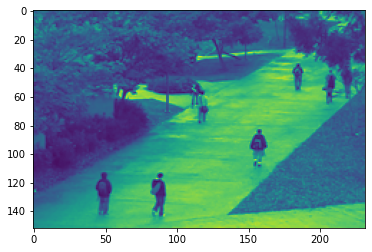

In [6]:
plt.imshow(img_array[:, 0].reshape(img_shape))

In [7]:
rpca = RobustPCA(n_components=2)
rpca.fit(img_array)

[1] Tolerance: 1e-05	Current error: 0.1179501875074192
[2] Tolerance: 1e-05	Current error: 0.11697522972935702
[3] Tolerance: 1e-05	Current error: 0.11623048585184015
[4] Tolerance: 1e-05	Current error: 0.07087910290715191
[5] Tolerance: 1e-05	Current error: 0.03910316868285155
[6] Tolerance: 1e-05	Current error: 0.023641475308967243
[7] Tolerance: 1e-05	Current error: 0.01726397741238838
[8] Tolerance: 1e-05	Current error: 0.013802095427419819
[9] Tolerance: 1e-05	Current error: 0.009861853519536251
[10] Tolerance: 1e-05	Current error: 0.004899377260109269
[11] Tolerance: 1e-05	Current error: 0.0018681880297544433
[12] Tolerance: 1e-05	Current error: 0.000685368232408177
[13] Tolerance: 1e-05	Current error: 0.0002613492943739613
[14] Tolerance: 1e-05	Current error: 9.654037022979153e-05
[15] Tolerance: 1e-05	Current error: 3.4707841571441676e-05
[16] Tolerance: 1e-05	Current error: 1.2385118526561346e-05
[17] Tolerance: 1e-05	Current error: 4.4051580676280955e-06
Tolerance condition m

In [8]:
img_tranformed_bg = rpca.inverse_transform(rpca.transform(img_array))

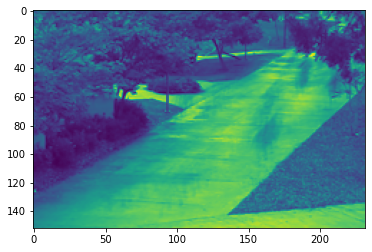

In [9]:
plt.imshow(img_tranformed_bg[:, 0].reshape(img_shape))

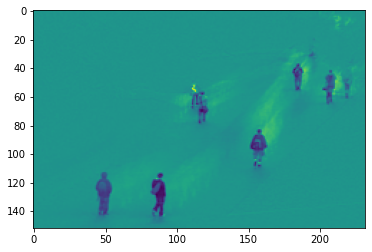

In [10]:
plt.imshow((img_array[:, 0] - img_tranformed_bg[:, 0]).reshape(img_shape))

In [11]:
rpca.low_rank_.shape

(35264, 170)

Text(0.5, 1.0, 'foreground')

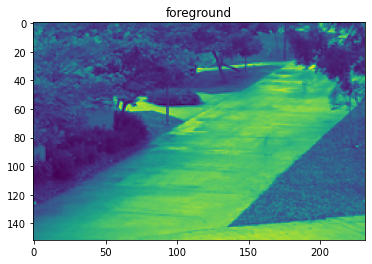

In [13]:
plt.imshow(rpca.low_rank_[:, 0].reshape(img_shape))
plt.title('foreground')

Text(0.5, 1.0, 'background')

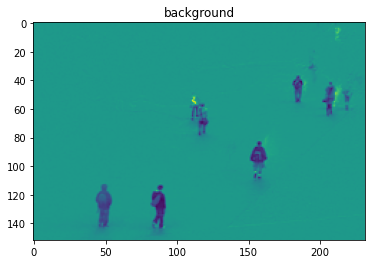

In [14]:
plt.imshow(rpca.sparse_[:, 0].reshape(img_shape))
plt.title('background')

Save the decompositions

In [ ]:
decomp_dir = Path.cwd() / 'decomp' / dataset
if not decomp_dir.is_dir():
    decomp_dir.mkdir(exist_ok=True)

for i,_ in enumerate(data_files):
    raw = img_array[:, i].reshape(img_shape)
    bg = (rpca.low_rank_[:, i] + rpca.mean_[i]).reshape(img_shape) 
    fg = (rpca.sparse_[:, i] + rpca.mean_[i]).reshape(img_shape)
    decomp = np.hstack([raw, bg, fg])
    Image.fromarray(np.uint8(decomp), mode='L').save(decomp_dir / f'frame_{i:04}.png')
#     print(decomp)
#     break
#     Image.fromarray(decomp)